In [59]:
import pandas as pd
import numpy as np
import math
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_nvda = yf.download('NVDA', start='2017-01-01',
                      end='2024-01-01', auto_adjust=True)
df_amd = yf.download('AMD', start='2017-01-01',
                      end='2024-01-01', auto_adjust=True)


# https://www.passmark.com/

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [60]:
def ma(df):
    for i in [60,120,250]:
        df[f"MA_{i}"] = df["Close"].rolling(i).mean()
    df = df.dropna()

In [42]:
ma(df_nvda)
df_nvda.sample(3)

,Open,High,Low,Close,Volume,MA_60,MA_120,MA_250
Date,,,,,,,,
2019-06-03,33.789818,34.177663,32.966889,33.260258,47864400,42.738624,39.611051,49.945111
2018-08-13,63.197280,64.648782,63.179943,63.440022,37520800,62.438489,60.543832,54.804124
2020-03-12,56.184127,58.840572,53.776876,53.903965,81654000,63.112531,56.359804,48.679640


In [43]:
ma(df_amd)
df_amd.sample(3)

,Open,High,Low,Close,Volume,MA_60,MA_120,MA_250
Date,,,,,,,,
2023-05-19,106.360001,107.290001,104.620003,105.820000,67830600,91.253833,82.155083,81.20772
2023-06-08,118.300003,122.209999,117.050003,121.050003,65246900,99.139333,87.093500,82.10424
2021-08-30,112.610001,114.489998,111.260002,111.320000,56130500,95.406333,87.458667,86.66212


In [44]:
def get_variable_name(variable):
    for name in globals():
        if id(globals()[name]) == id(variable):
            return name
    for name in locals():
        if id(locals()[name]) == id(variable):
            return name
    return None

In [45]:
def magraph(df):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.01, row_heights=[0.7,0.3])
    fig.add_trace(go.Candlestick(x=df.index,
                                open=df['Open'], high=df['High'],
                                low=df['Low'], close=df['Close'],
                                showlegend=True, name='Close Price'),row=1,col=1)
    fig.add_scatter(x=df.index, y=df['MA_60'], name='MA60')
    fig.add_scatter(x=df.index, y=df['MA_120'], name='MA120')
    fig.add_scatter(x=df.index, y=df['MA_250'], name='MA250')
    fig.add_trace(go.Line(x=df.index, y=df.Volume,
                        showlegend=True, name='Volume',
                        marker=dict(color='rgb(125,125,222)')),row=2,col=1)
    
    name = get_variable_name(df).upper()
    name = name[3:]
    fig.update_layout(title=f'{name} Share Price (Close) US$',
                    xaxis_rangeslider_visible=False,width=1000)
    fig.show()

In [46]:
df_amd['Close'].max()

161.91000366210938

In [47]:
magraph(df_nvda)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [48]:
magraph(df_amd)

In [49]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.01, row_heights=[0.7,0.3])



## AI

In [50]:
df_nvda_2000 = yf.download('NVDA', start='2000-01-01',
                      end='2024-01-01', auto_adjust=True)

df_nvda_2000 = df_nvda_2000[['Close']].dropna()

df_amd_2000 = yf.download('AMD', start='2000-01-01',
                      end='2024-01-01', auto_adjust=True).dropna()

df_amd_2000 = df_amd_2000[['Close']].dropna()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [51]:
df_amd_2000['Date'] = df_amd_2000.index
df_amd_2000

,Close,Date
Date,,
2000-01-03,15.500000,2000-01-03
2000-01-04,14.625000,2000-01-04
2000-01-05,15.000000,2000-01-05
2000-01-06,16.000000,2000-01-06
2000-01-07,16.250000,2000-01-07
...,...,...
2023-09-26,95.959999,2023-09-26
2023-09-27,98.070000,2023-09-27
2023-09-28,102.760002,2023-09-28


In [52]:
type(df_amd_2000['Date'].index)


pandas.core.indexes.datetimes.DatetimeIndex

In [53]:
import numpy as np

my_array = np.array(['abc', 'bbc', 'cbc', 'dbc'])
print("Original array:", my_array)

# Remove 'bc' from each element
result_array = np.array([x.replace('bc', '') for x in my_array])
print("Array after removing 'bc':", result_array)

Original array: ['abc' 'bbc' 'cbc' 'dbc']
Array after removing 'bc': ['a' 'b' 'c' 'd']


In [54]:
# date = np.array(df_amd_2000['Date'],dtype=str)
# new = np.array([x.replace('T00:00:00.000000000','') for x in date])
# new2 = np.array([x.replace('-','') for x in new],dtype=int)
# df_amd_2000['Date'] = df_amd_2000['Date'].astype('int32')


In [55]:
# for day in df_amd_2000['Date']:
#     day = 3
#     df_amd_2000['Date']=df_amd_2000['Date'] + pd.Timedelta(days=3)
#     df_amd_2000['Date']=df_amd_2000['Date']
# df_amd_2000['Date']
# df_amd_2000.apply(lambda x: x['Date'] + pd.DateOffset(days = x['year shift']), axis=1)

df_amd_2000['Date'] = df_amd_2000.index
df_amd_2000['day shift'] = 366
df_amd_2000['Date'] = df_amd_2000['Date'] + pd.TimedeltaIndex(df_amd_2000['day shift'], unit='D')
df_amd_2000=df_amd_2000.drop(['day shift'],axis=1)
df_amd_2000.index = df_amd_2000['Date']
df_amd_2000 = df_amd_2000.drop(['Date'],axis=1)

df_amd_2000

,Close
Date,
2001-01-03,15.500000
2001-01-04,14.625000
2001-01-05,15.000000
2001-01-06,16.000000
2001-01-07,16.250000
...,...
2024-09-26,95.959999
2024-09-27,98.070000
2024-09-28,102.760002


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
future = 365
def future(df, future): # def 1 (sample)
    df['Prediction'] = df[['Close']].shift(-future)
    X = np.array(df.drop(['Prediction'],axis=1))[:-future]
    y = np.array(df['Prediction'])[:-future]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    tree = DecisionTreeRegressor().fit(X_train, y_train)
    X_future = df.drop('Prediction',axis=1)[:-future]
    X_future = X_future.tail(future)
    X_future = np.array(X_future)
    tree_prediction = tree.predict(X_future)
    valid = df[X.shape[0]:]
    valid['Prediction'] = tree_prediction
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel("time")
    plt.ylabel('Close Price')
    plt.plot(df['Close'])
    plt.plot(valid[['Close','Prediction']])
    plt.legend(['Orig','Val','Pred'])
    plt.show()


In [57]:
def future(df, future): # def 2 (sample)
    
    df['Prediction'] = df[['Close']].shift(-future)
    X = np.array(df.drop(['Prediction'],axis=1))[:-future]
    y = np.array(df['Prediction'])[:-future]
    i=future
    df['Date'] = df[['Date']].shift(-i).ffill()
    while i > 0:
        df.iloc[-i, df.columns.get_loc('Date')]=df.iloc[-i-1,df.columns.get_loc('Date')]+1
        i-=1
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    tree = DecisionTreeRegressor().fit(X_train, y_train)
    X_future = df.drop('Prediction',axis=1)[:-future]
    X_future = X_future.tail(future)
    X_future = np.array(X_future)
    tree_prediction = tree.predict(X_future)
    valid = df[X.shape[0]:]
    valid['Prediction'] = tree_prediction
    df.fillna(valid,inplace=True)
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel("time")
    plt.ylabel('Close Price')
    plt.plot(df['Close'])
    plt.plot(valid[['Close','Prediction']])
    plt.legend(['Orig','Val','Pred'])
    plt.show()

In [61]:
df = df_amd_2000
# df['Date'] = df.index
# df['day shift'] = 365+1
# df['Date'] = df['Date'] + pd.TimedeltaIndex(df['day shift'], unit='D')

df=df.drop(['day shift'],axis=1)
df.index = df['Date']
df = df.drop(['Date'],axis=1)
df

KeyError: "['day shift'] not found in axis"

In [65]:
# def shiftday(df,future):
#     df['Date'] = df.index
#     df['day shift'] = int(future+1)
#     df['Date'] = df['Date'] + pd.TimedeltaIndex(df['day shift'], unit='D')
#     df=df.drop(['day shift'],axis=1)
#     df.index = df['Date']
#     df = df.drop(['Date'],axis=1)
#     return df
import pandas as pd
import numpy as np
import math
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def reset():
    global df_amd_2000, df_nvda_2000
    df_nvda_2000 = yf.download('NVDA', start='2000-01-01',
                      end='2024-01-01', auto_adjust=True)

    df_nvda_2000 = df_nvda_2000[['Close']].dropna()

    df_amd_2000 = yf.download('AMD', start='2000-01-01',
                      end='2024-01-01', auto_adjust=True).dropna()

    df_amd_2000 = df_amd_2000[['Close']].dropna()
    
    return df_amd_2000, df_nvda_2000

   
def future(df, future):
    i=future
    df['Prediction'] = df[['Close']].shift(-i)
    X = np.array(df.drop(['Prediction'],axis=1))[:-i]
    y = np.array(df['Prediction'])[:-i]
    pd.options.mode.chained_assignment = None 
    
    df['Date'] = df.index
    df['day shift'] = int(i+1)
    df['Date'] = df['Date'] + pd.TimedeltaIndex(df['day shift'], unit='D')
    df=df.drop(['day shift'],axis=1)
    df.index = df['Date']
    # df.set_index(['Date'])
    df = df.drop(['Date'],axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    tree = DecisionTreeRegressor().fit(X_train, y_train)
    X_future = df.drop('Prediction',axis=1)[:-future]
    X_future = X_future.tail(future)
    X_future = np.array(X_future)
    tree_prediction = tree.predict(X_future)
    valid = df[X.shape[0]:]
    valid['Prediction'] = tree_prediction
    df.fillna(valid,inplace=True)

    plt.figure(figsize=(16,8))
    # plt.title(f'The Predict Stock price of')
    plt.xlabel("time")
    plt.ylabel('Close Price')
    plt.plot(df['Close'])
    plt.plot(valid[['Close','Prediction']])
    plt.legend(['Orig','Val','Pred'])
    
    pd.set_option('display.max_rows', 9999)
    # return df.drop(columns = ['Close']).tail(62)
    return print(valid.drop(columns = ['Close']).tail(10))

In [63]:
def clean(df):
    df=df.drop(['day shift'],axis=1)
    df.index = df['Date']
    df = df.drop(['Date'],axis=1)
    return df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
            Prediction
Date                  
2023-10-20  101.610001
2023-10-21  100.339996
2023-10-22   96.110001
2023-10-23   96.199997
2023-10-26   97.379997
2023-10-27   94.509998
2023-10-28   98.070000
2023-10-29  102.760002
2023-10-30  100.339996
2023-11-02  122.279999


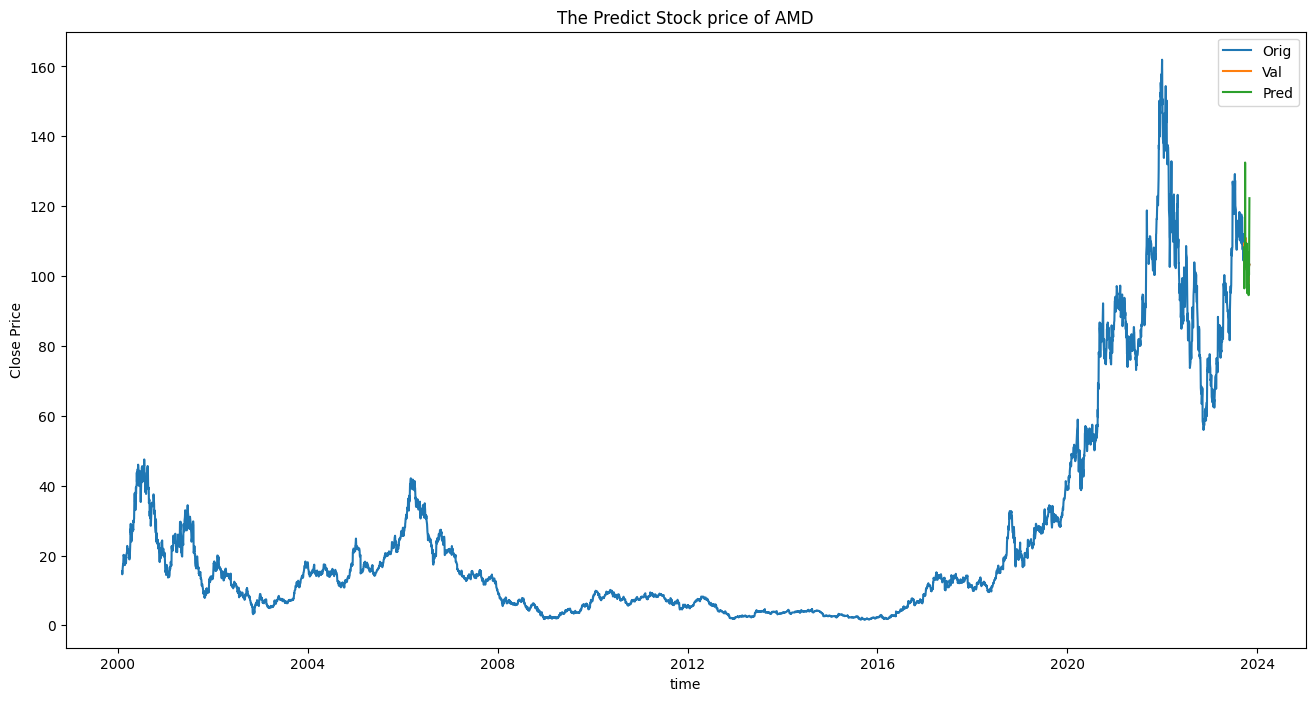

                 Close  Prediction       Date  day shift
Date                                                    
2023-09-26   95.959999         NaN 2023-10-27         31
2023-09-27   98.070000         NaN 2023-10-28         31
2023-09-28  102.760002         NaN 2023-10-29         31
2023-09-29  102.820000         NaN 2023-10-30         31
2023-10-02  103.269997         NaN 2023-11-02         31


In [66]:
# shiftday(df_amd_2000,300)
reset()
future(df_amd_2000,30)
plt.title('The Predict Stock price of AMD')
plt.show()
# clean(df_amd_2000)
print(df_amd_2000.tail(5))

In [ ]:
reset()
future(df_nvda_2000,30)
plt.title('The Predict Stock price of Nvidia')
plt.show()

### market share

In [ ]:
# Ax plot of pie chart
import matplotlib.pyplot as plt
import numpy as np
data = ['198 other','4403 AMD','11465 NVIDIA','3375 Intel']
units = [int(x.split()[0]) for x in data]
grapic_cards = [x.split()[-1] for x in data]
myexplode = [x / max(units)/5 for x in units]

# create autocpt argument
# autocpt enables you to display the precent value using python string format
def func(pct,allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return '{:.1f}%\n({:d} Units)'.format(pct,absolute)

wedges, text, autotexts = plt.pie(units,autopct=lambda pct:func(pct,units),
                                 textprops = dict(color='black'),explode=myexplode)
plt.legend(wedges,grapic_cards,title='Graphic Card',
          loc = 'center left',bbox_to_anchor=(1,0,0.5,1))
plt.setp(autotexts, size=8,weight='bold')
plt.title("Video Card Manufacturer Market Share (Last 30 Days)", fontsize=18)
plt.suptitle("Last updated on the 27th of September 2023", fontsize=18,x=0.5,y=0.1)
plt.show()

In [ ]:
train = pd.read_csv('All_GPUs.csv')
print(train.columns)

### Performance

In [ ]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(dict(
    grapic_cards = ["GeForce RTX 4090 (Nvidia)", "GeForce RTX 4080 (Nvidia)", "Radeon PRO W7800 (AMD)", "GeForce RTX 4070 Ti (Nvidia)", "Radeon RX 7900 XTX (AMD)"],
    G3Dmark = [38939, 34822, 32146, 31651, 31140]))

fig = px.bar(df, x = 'G3Dmark', y = 'grapic_cards',color = 'grapic_cards',color_discrete_sequence=[
                 "green", "green", "red", "green", "red"],width = 800)
fig.update(layout_xaxis_range = [30000,40000],layout_title_text = 'Performance',layout_xaxis_title="G3D mark",layout_yaxis_title="Grapic Cards")
fig.show()

### Price

In [ ]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(dict(
    grapic_cards = ["Radeon RX 6650 XT (AMD)", "GeForce RTX 3060 (Nvidia)", "GeForce RTX 2060 (Nvidia)", "Radeon RX 6600M (AMD)","GeForce RTX 4060 (Nvidia)"],
    G3Dmark_Price = [76.2, 71.4, 67.2, 64.8, 64.6]))

fig = px.bar(df, x = 'G3Dmark_Price', y = 'grapic_cards',color='grapic_cards',color_discrete_sequence=[
                 "red", "green", "green", "red", "green"],width = 800)
fig.update(layout_xaxis_range = [60,80],layout_title_text = 'Performance / Price (USD)',layout_xaxis_title="G3D mark / Price (USD)",layout_yaxis_title="Grapic Cards")
fig.show()

## Sum

MA Graph of AMD and Nvidia
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Prediction of AMD and Nvidia
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Date
2023-10-20    101.610001
2023-10-21    100.339996
2023-10-22     96.110001
2023-10-23    105.720001
2023-10-26     97.379997
2023-10-27     95.959999
2023-10-28    104.680000
2023-10-29    102.760002
2023-10-30    102.820000
2023-11-02    103.269997
Name: Prediction, dtype: float64


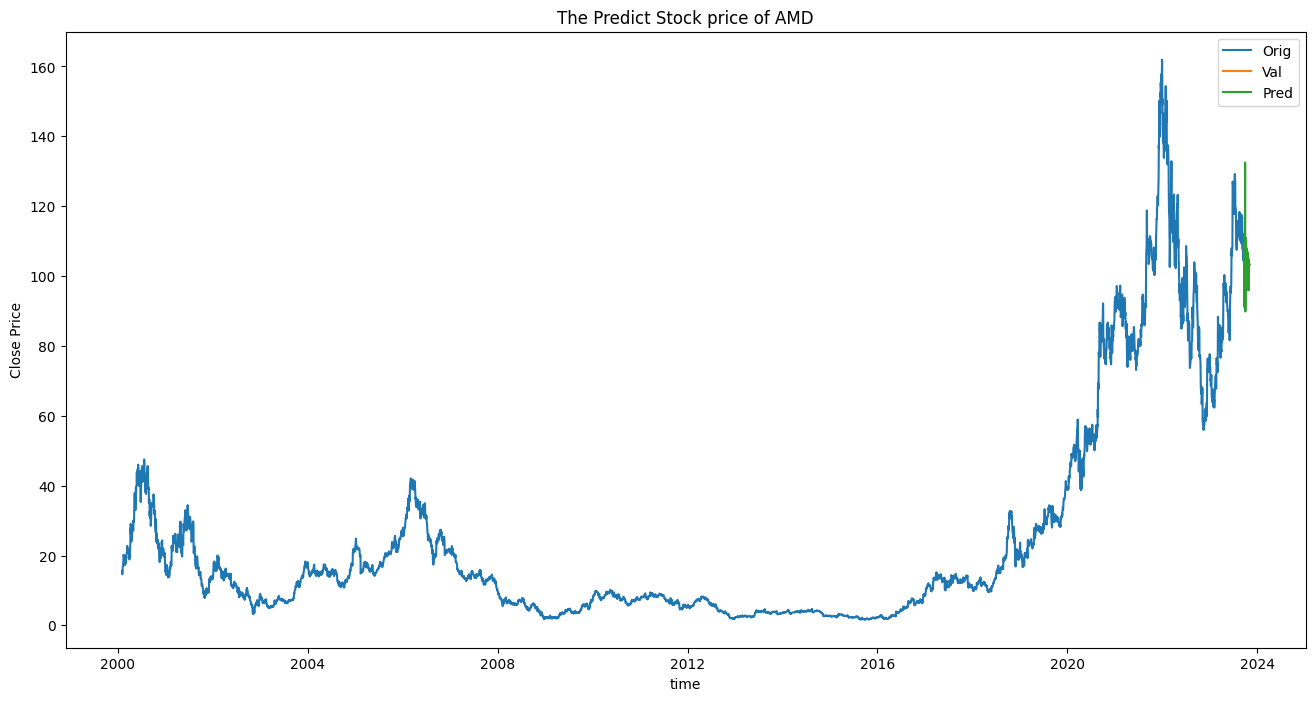

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Date
2023-10-20    435.200012
2023-10-21    422.390015
2023-10-22    410.170013
2023-10-23    416.100006
2023-10-26    422.220001
2023-10-27    442.653534
2023-10-28    424.679993
2023-10-29    434.989990
2023-10-30    434.989990
2023-11-02    447.820007
Name: Prediction, dtype: float64


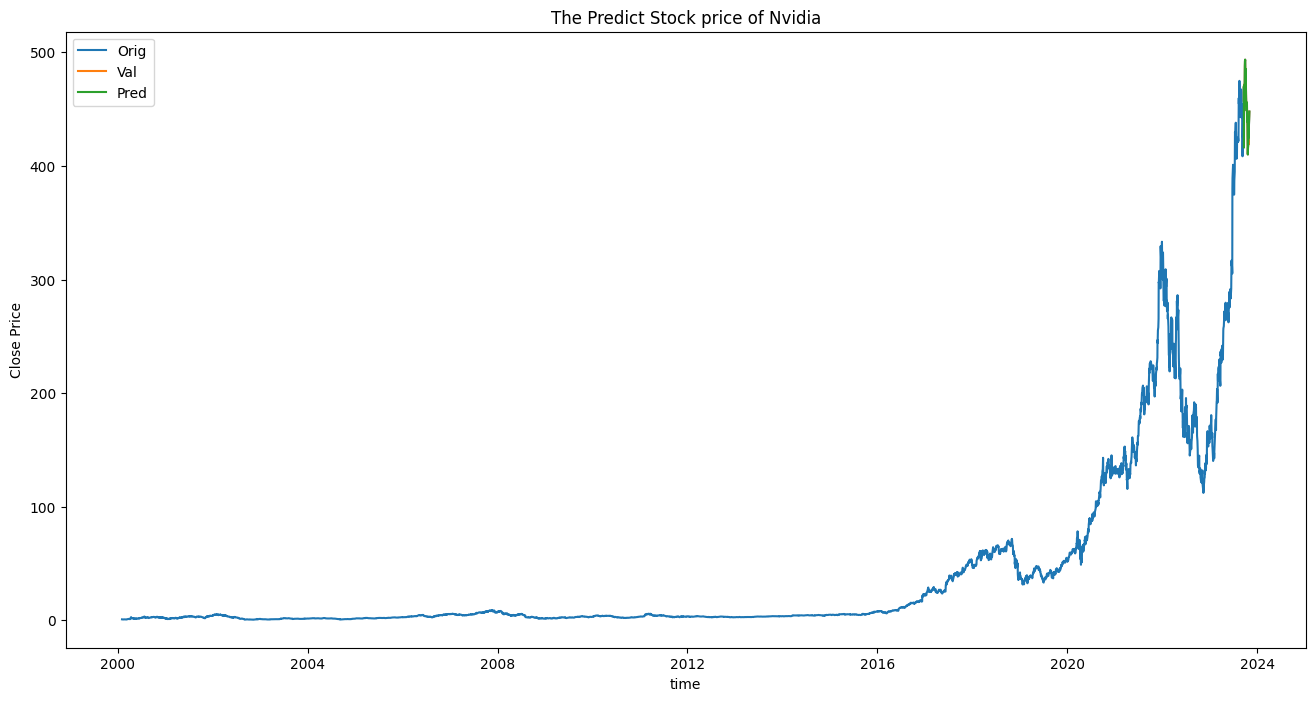

Market Share of Graphic Card Brands


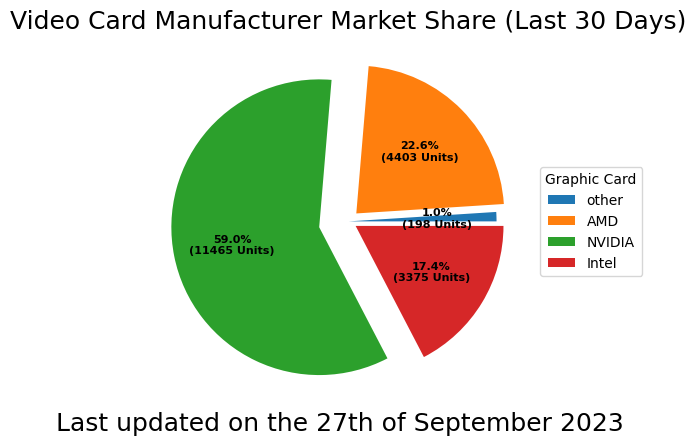

Performance of Graphic Card


Price (USD) per Performance of Graphic Card


Polynomial Regression Line of AMD and Nvidia
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [68]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


def ma(df):
    for i in [60,120,250]:
        df[f"MA_{i}"] = df["Close"].rolling(i).mean()
    df = df.dropna()
    

def get_variable_name(variable):
    for name in globals():
        if id(globals()[name]) == id(variable):
            return name
    for name in locals():
        if id(locals()[name]) == id(variable):
            return name
    return None


def magraph(df):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.01, row_heights=[0.7,0.3])
    fig.add_trace(go.Candlestick(x=df.index,
                                open=df['Open'], high=df['High'],
                                low=df['Low'], close=df['Close'],
                                showlegend=True, name='Close Price'),row=1,col=1)
    fig.add_scatter(x=df.index, y=df['MA_60'], name='MA60')
    fig.add_scatter(x=df.index, y=df['MA_120'], name='MA120')
    fig.add_scatter(x=df.index, y=df['MA_250'], name='MA250')
    fig.add_trace(go.Scatter(x=df.index, y=df.Volume,
                        showlegend=True, name='Volume',
                        marker=dict(color='rgb(125,125,222)')),row=2,col=1)
    
    name = get_variable_name(df).upper()
    name = name[3:]
    fig.update_layout(title=f'{name} Share Price (Close) US$',
                    xaxis_rangeslider_visible=False,width=1000)
    fig.show()
    
    
def reset():
    global df_amd_2000, df_nvda_2000
    df_nvda_2000 = yf.download('NVDA', start='2000-01-01',
                      end='2024-01-01', auto_adjust=True)

    df_nvda_2000 = df_nvda_2000[['Close']].dropna()

    df_amd_2000 = yf.download('AMD', start='2000-01-01',
                      end='2024-01-01', auto_adjust=True).dropna()

    df_amd_2000 = df_amd_2000[['Close']].dropna()
    
    return df_amd_2000, df_nvda_2000
 
 
def future(df, future):
    i=future
    df['Prediction'] = df[['Close']].shift(-i)
    X = np.array(df.drop(['Prediction'],axis=1))[:-i]
    y = np.array(df['Prediction'])[:-i]
    pd.options.mode.chained_assignment = None 
    
    df['Date'] = df.index
    df['day shift'] = int(i+1)
    df['Date'] = df['Date'] + pd.TimedeltaIndex(df['day shift'], unit='D')
    df=df.drop(['day shift'],axis=1)
    df.index = df['Date']
    df = df.drop(['Date'],axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    tree = DecisionTreeRegressor().fit(X_train, y_train)
    X_future = df.drop('Prediction',axis=1)[:-future]
    X_future = X_future.tail(future)
    X_future = np.array(X_future)
    tree_prediction = tree.predict(X_future)
    valid = df[X.shape[0]:]
    valid['Prediction'] = tree_prediction
    df.fillna(valid,inplace=True)

    plt.figure(figsize=(16,8))
    plt.xlabel("time")
    plt.ylabel('Close Price')
    plt.plot(df['Close'])
    plt.plot(valid[['Close','Prediction']])
    plt.legend(['Orig','Val','Pred'])
    
    pd.set_option('display.max_rows', 9999)
    valid = valid['Prediction']
    return print(valid.drop(columns = ['Close']).tail(10))


print('MA Graph of AMD and Nvidia')

df_nvda = yf.download('NVDA', start='2017-01-01',
                      end='2024-01-01', auto_adjust=True)
df_amd = yf.download('AMD', start='2017-01-01',
                      end='2024-01-01', auto_adjust=True)
ma(df_nvda)
ma(df_amd)
magraph(df_nvda)
magraph(df_amd)


print('Prediction of AMD and Nvidia')

df_nvda_2000 = yf.download('NVDA', start='2000-01-01',
                      end='2024-01-01', auto_adjust=True)
df_nvda_2000 = df_nvda_2000[['Close']].dropna()
df_amd_2000 = yf.download('AMD', start='2000-01-01',
                      end='2024-01-01', auto_adjust=True).dropna()
df_amd_2000 = df_amd_2000[['Close']].dropna()

reset()
future(df_amd_2000,30)
plt.title('The Predict Stock price of AMD')
plt.show()

reset()
future(df_nvda_2000,30)
plt.title('The Predict Stock price of Nvidia')
plt.show()


print('Market Share of Graphic Card Brands')

data = ['198 other','4403 AMD','11465 NVIDIA','3375 Intel']
units = [int(x.split()[0]) for x in data]
grapic_cards = [x.split()[-1] for x in data]
myexplode = [x / max(units)/5 for x in units]
def func(pct,allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return '{:.1f}%\n({:d} Units)'.format(pct,absolute)
wedges, text, autotexts = plt.pie(units,autopct=lambda pct:func(pct,units),
                                 textprops = dict(color='black'),explode=myexplode)
plt.legend(wedges,grapic_cards,title='Graphic Card',
          loc = 'center left',bbox_to_anchor=(1,0,0.5,1))
plt.setp(autotexts, size=8,weight='bold')
plt.title("Video Card Manufacturer Market Share (Last 30 Days)", fontsize=18)
plt.suptitle("Last updated on the 27th of September 2023", fontsize=18,x=0.5,y=0.1)
plt.show()


print('Performance of Graphic Card')

df = pd.DataFrame(dict(
    grapic_cards = ["GeForce RTX 4090 (Nvidia)", "GeForce RTX 4080 (Nvidia)", "Radeon PRO W7800 (AMD)", "GeForce RTX 4070 Ti (Nvidia)", "Radeon RX 7900 XTX (AMD)"],
    G3Dmark = [38939, 34822, 32146, 31651, 31140]))

fig1 = px.bar(df, x = 'G3Dmark', y = 'grapic_cards',color = 'grapic_cards',color_discrete_sequence=[
                 "green", "green", "red", "green", "red"],width = 800)
fig1.update(layout_xaxis_range = [30000,40000],layout_title_text = 'Performance',layout_xaxis_title="G3D mark",layout_yaxis_title="Grapic Cards")
fig1.show()


print('Price (USD) per Performance of Graphic Card')

df = pd.DataFrame(dict(
    grapic_cards = ["Radeon RX 6650 XT (AMD)", "GeForce RTX 3060 (Nvidia)", "GeForce RTX 2060 (Nvidia)", "Radeon RX 6600M (AMD)","GeForce RTX 4060 (Nvidia)"],
    G3Dmark_Price = [76.2, 71.4, 67.2, 64.8, 64.6]))

fig2 = px.bar(df, x = 'G3Dmark_Price', y = 'grapic_cards',color='grapic_cards',color_discrete_sequence=[
                 "red", "green", "green", "red", "green"],width = 800)
fig2.update(layout_xaxis_range = [60,80],layout_title_text = 'Performance / Price (USD)',layout_xaxis_title="G3D mark / Price (USD)",layout_yaxis_title="Grapic Cards")
fig2.show()


print('Polynomial Regression Line of AMD and Nvidia')

df_nvda_2018 = yf.download('NVDA', start='2018-01-01',
                      end='2024-01-01', auto_adjust=True)
df_nvda_2018 = df_nvda_2018[['Close']].dropna()
df_nvda_2018['Date'] = df_nvda_2018.index
df_amd_2018 = yf.download('AMD', start='2018-01-01',
                      end='2024-01-01', auto_adjust=True).dropna()
df_amd_2018 = df_amd_2018[['Close']].dropna()
df_amd_2018['Date'] = df_amd_2018.index

df = df_nvda_2018
fig = px.scatter(df, x="Date", y="Close", 
                 trendline="ols", trendline_options=dict(log_y=True),
                 title="Nvidia Polynomial Regression Line")
fig.show()

df = df_amd_2018
fig = px.scatter(df, x="Date", y="Close", 
                 trendline="ols", trendline_options=dict(log_y=True),
                 title="AMD Polynomial Regression Line")
fig.show()

In [ ]:
    for i in [60,120,250]:
        df[f"MA_{i}"] = df["Close"].rolling(i).mean()
    df = df.dropna()
    

def get_variable_name(variable):
    for name in globals():
        if id(globals()[name]) == id(variable):
            return name
    for name in locals():
        if id(locals()[name]) == id(variable):
            return name
    return None


def magraph(df):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.01, row_heights=[0.7,0.3])
    fig.add_trace(go.Candlestick(x=df.index,
                                open=df['Open'], high=df['High'],
                                low=df['Low'], close=df['Close'],
                                showlegend=True, name='Close Price'),row=1,col=1)
    fig.add_scatter(x=df.index, y=df['MA_60'], name='MA60')
    fig.add_scatter(x=df.index, y=df['MA_120'], name='MA120')
    fig.add_scatter(x=df.index, y=df['MA_250'], name='MA250')
    fig.add_trace(go.Scatter(x=df.index, y=df.Volume,
                        showlegend=True, name='Volume',
                        marker=dict(color='rgb(125,125,222)')),row=2,col=1)
    
    name = get_variable_name(df).upper()
    name = name[3:]
    fig.update_layout(title=f'{name} Share Price (Close) US$',
                    xaxis_rangeslider_visible=False,width=1000)
    fig.show()
    
    
def reset():
    global df_amd_2000, df_nvda_2000
    df_nvda_2000 = yf.download('NVDA', start='2000-01-01',
                      end='2024-01-01', auto_adjust=True)

    df_nvda_2000 = df_nvda_2000[['Close']].dropna()

    df_amd_2000 = yf.download('AMD', start='2000-01-01',
                      end='2024-01-01', auto_adjust=True).dropna()

    df_amd_2000 = df_amd_2000[['Close']].dropna()
    
    return df_amd_2000, df_nvda_2000
 
 
def future(df, future):
    i=future
    df['Prediction'] = df[['Close']].shift(-i)
    X = np.array(df.drop(['Prediction'],axis=1))[:-i]
    y = np.array(df['Prediction'])[:-i]
    pd.options.mode.chained_assignment = None 
    
    df['Date'] = df.index
    df['day shift'] = int(i+1)
    df['Date'] = df['Date'] + pd.TimedeltaIndex(df['day shift'], unit='D')
    df=df.drop(['day shift'],axis=1)
    df.index = df['Date']
    df = df.drop(['Date'],axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    tree = DecisionTreeRegressor().fit(X_train, y_train)
    X_future = df.drop('Prediction',axis=1)[:-future]
    X_future = X_future.tail(future)
    X_future = np.array(X_future)
    tree_prediction = tree.predict(X_future)
    valid = df[X.shape[0]:]
    valid['Prediction'] = tree_prediction
    df.fillna(valid,inplace=True)

    plt.figure(figsize=(16,8))
    plt.xlabel("time")
    plt.ylabel('Close Price')
    plt.plot(df['Close'])
    plt.plot(valid[['Close','Prediction']])
    plt.legend(['Orig','Val','Pred'])
    
    pd.set_option('display.max_rows', 9999)
    valid = valid['Prediction']
    return print(valid.drop(columns = ['Close']).tail(10))


print('MA Graph of AMD and Nvidia')

df_nvda = yf.download('NVDA', start='2017-01-01',
                      end='2024-01-01', auto_adjust=True)
df_amd = yf.download('AMD', start='2017-01-01',
                      end='2024-01-01', auto_adjust=True)
ma(df_nvda)
ma(df_amd)
magraph(df_nvda)
magraph(df_amd)


print('Prediction of AMD and Nvidia')

df_nvda_2000 = yf.download('NVDA', start='2000-01-01',
                      end='2024-01-01', auto_adjust=True)
df_nvda_2000 = df_nvda_2000[['Close']].dropna()
df_amd_2000 = yf.download('AMD', start='2000-01-01',
                      end='2024-01-01', auto_adjust=True).dropna()
df_amd_2000 = df_amd_2000[['Close']].dropna()

reset()
future(df_amd_2000,30)
plt.title('The Predict Stock price of AMD')
plt.show()

reset()
future(df_nvda_2000,30)
plt.title('The Predict Stock price of Nvidia')
plt.show()


print('Market Share of Graphic Card Brands')

data = ['198 other','4403 AMD','11465 NVIDIA','3375 Intel']
units = [int(x.split()[0]) for x in data]
grapic_cards = [x.split()[-1] for x in data]
myexplode = [x / max(units)/5 for x in units]
def func(pct,allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return '{:.1f}%\n({:d} Units)'.format(pct,absolute)
wedges, text, autotexts = plt.pie(units,autopct=lambda pct:func(pct,units),
                                 textprops = dict(color='black'),explode=myexplode)
plt.legend(wedges,grapic_cards,title='Graphic Card',
          loc = 'center left',bbox_to_anchor=(1,0,0.5,1))
plt.setp(autotexts, size=8,weight='bold')
plt.title("Video Card Manufacturer Market Share (Last 30 Days)", fontsize=18)
plt.suptitle("Last updated on the 27th of September 2023", fontsize=18,x=0.5,y=0.1)
plt.show()


print('Performance of Graphic Card')

df = pd.DataFrame(dict(
    grapic_cards = ["GeForce RTX 4090 (Nvidia)", "GeForce RTX 4080 (Nvidia)", "Radeon PRO W7800 (AMD)", "GeForce RTX 4070 Ti (Nvidia)", "Radeon RX 7900 XTX (AMD)"],
    G3Dmark = [38939, 34822, 32146, 31651, 31140]))

fig1 = px.bar(df, x = 'G3Dmark', y = 'grapic_cards',color = 'grapic_cards',color_discrete_sequence=[
                 "green", "green", "red", "green", "red"],width = 800)
fig1.update(layout_xaxis_range = [30000,40000],layout_title_text = 'Performance',layout_xaxis_title="G3D mark",layout_yaxis_title="Grapic Cards")
fig1.show()


print('Price (USD) per Performance of Graphic Card')

df = pd.DataFrame(dict(
    grapic_cards = ["Radeon RX 6650 XT (AMD)", "GeForce RTX 3060 (Nvidia)", "GeForce RTX 2060 (Nvidia)", "Radeon RX 6600M (AMD)","GeForce RTX 4060 (Nvidia)"],
    G3Dmark_Price = [76.2, 71.4, 67.2, 64.8, 64.6]))

fig2 = px.bar(df, x = 'G3Dmark_Price', y = 'grapic_cards',color='grapic_cards',color_discrete_sequence=[
                 "red", "green", "green", "red", "green"],width = 800)
fig2.update(layout_xaxis_range = [60,80],layout_title_text = 'Performance / Price (USD)',layout_xaxis_title="G3D mark / Price (USD)",layout_yaxis_title="Grapic Cards")
fig2.show()


print('Polynomial Regression Line of AMD and Nvidia')

df_nvda_2018 = yf.download('NVDA', start='2018-01-01',
                      end='2024-01-01', auto_adjust=True)
df_nvda_2018 = df_nvda_2018[['Close']].dropna()
df_nvda_2018['Date'] = df_nvda_2018.index
df_amd_2018 = yf.download('AMD', start='2018-01-01',
                      end='2024-01-01', auto_adjust=True).dropna()
df_amd_2018 = df_amd_2018[['Close']].dropna()
df_amd_2018['Date'] = df_amd_2018.index

df = df_nvda_2018
fig = px.scatter(df, x="Date", y="Close", 
                 trendline="ols", trendline_options=dict(log_y=True),
                 title="Nvidia Polynomial Regression Line")
fig.show()

df = df_amd_2018
fig = px.scatter(df, x="Date", y="Close", 
                 trendline="ols", trendline_options=dict(log_y=True),
                 title="AMD Polynomial Regression Line")
fig.show()

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


def ma(df):
    for i in [60,120,250]:
        df[f"MA_{i}"] = df["Close"].rolling(i).mean()
    df = df.dropna()
    

def get_variable_name(variable):
    for name in globals():
        if id(globals()[name]) == id(variable):
            return name
    for name in locals():
        if id(locals()[name]) == id(variable):
            return name
    return None


def magraph(df):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.01, row_heights=[0.7,0.3])
    fig.add_trace(go.Candlestick(x=df.index,
                                open=df['Open'], high=df['High'],
                                low=df['Low'], close=df['Close'],
                                showlegend=True, name='Close Price'),row=1,col=1)
    fig.add_scatter(x=df.index, y=df['MA_60'], name='MA60')
    fig.add_scatter(x=df.index, y=df['MA_120'], name='MA120')
    fig.add_scatter(x=df.index, y=df['MA_250'], name='MA250')
    fig.add_trace(go.Scatter(x=df.index, y=df.Volume,
                        showlegend=True, name='Volume',
                        marker=dict(color='rgb(125,125,222)')),row=2,col=1)
    
    name = get_variable_name(df).upper()
    name = name[3:]
    fig.update_layout(title=f'{name} Share Price (Close) US$',
                    xaxis_rangeslider_visible=False,width=1000)
    fig.show()
    
    
def reset():
    global df_amd_2000, df_nvda_2000
    df_nvda_2000 = yf.download('NVDA', start='2000-01-01',
                      end='2024-01-01', auto_adjust=True)

    df_nvda_2000 = df_nvda_2000[['Close']].dropna()

    df_amd_2000 = yf.download('AMD', start='2000-01-01',
                      end='2024-01-01', auto_adjust=True).dropna()

    df_amd_2000 = df_amd_2000[['Close']].dropna()
    
    return df_amd_2000, df_nvda_2000
 
 
def future(df, future):
    i=future
    df['Prediction'] = df[['Close']].shift(-i)
    X = np.array(df.drop(['Prediction'],axis=1))[:-i]
    y = np.array(df['Prediction'])[:-i]
    pd.options.mode.chained_assignment = None 
    
    df['Date'] = df.index
    df['day shift'] = int(i+1)
    df['Date'] = df['Date'] + pd.TimedeltaIndex(df['day shift'], unit='D')
    df=df.drop(['day shift'],axis=1)
    df.index = df['Date']
    df = df.drop(['Date'],axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    tree = DecisionTreeRegressor().fit(X_train, y_train)
    X_future = df.drop('Prediction',axis=1)[:-future]
    X_future = X_future.tail(future)
    X_future = np.array(X_future)
    tree_prediction = tree.predict(X_future)
    valid = df[X.shape[0]:]
    valid['Prediction'] = tree_prediction
    df.fillna(valid,inplace=True)

    plt.figure(figsize=(16,8))
    plt.xlabel("time")
    plt.ylabel('Close Price')
    plt.plot(df['Close'])
    plt.plot(valid[['Close','Prediction']])
    plt.legend(['Orig','Val','Pred'])
    
    pd.set_option('display.max_rows', 9999)
    valid = valid['Prediction']
    return print(valid.drop(columns = ['Close']).tail(10))


print('MA Graph of AMD and Nvidia')

df_nvda = yf.download('NVDA', start='2017-01-01',
                      end='2024-01-01', auto_adjust=True)
df_amd = yf.download('AMD', start='2017-01-01',
                      end='2024-01-01', auto_adjust=True)
ma(df_nvda)
ma(df_amd)
magraph(df_nvda)
magraph(df_amd)


print('Prediction of AMD and Nvidia')

df_nvda_2000 = yf.download('NVDA', start='2000-01-01',
                      end='2024-01-01', auto_adjust=True)
df_nvda_2000 = df_nvda_2000[['Close']].dropna()
df_amd_2000 = yf.download('AMD', start='2000-01-01',
                      end='2024-01-01', auto_adjust=True).dropna()
df_amd_2000 = df_amd_2000[['Close']].dropna()

reset()
future(df_amd_2000,30)
plt.title('The Predict Stock price of AMD')
plt.show()

reset()
future(df_nvda_2000,30)
plt.title('The Predict Stock price of Nvidia')
plt.show()


print('Market Share of Graphic Card Brands')

data = ['198 other','4403 AMD','11465 NVIDIA','3375 Intel']
units = [int(x.split()[0]) for x in data]
grapic_cards = [x.split()[-1] for x in data]
myexplode = [x / max(units)/5 for x in units]
def func(pct,allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return '{:.1f}%\n({:d} Units)'.format(pct,absolute)
wedges, text, autotexts = plt.pie(units,autopct=lambda pct:func(pct,units),
                                 textprops = dict(color='black'),explode=myexplode)
plt.legend(wedges,grapic_cards,title='Graphic Card',
          loc = 'center left',bbox_to_anchor=(1,0,0.5,1))
plt.setp(autotexts, size=8,weight='bold')
plt.title("Video Card Manufacturer Market Share (Last 30 Days)", fontsize=18)
plt.suptitle("Last updated on the 27th of September 2023", fontsize=18,x=0.5,y=0.1)
plt.show()


print('Performance of Graphic Card')

df = pd.DataFrame(dict(
    grapic_cards = ["GeForce RTX 4090 (Nvidia)", "GeForce RTX 4080 (Nvidia)", "Radeon PRO W7800 (AMD)", "GeForce RTX 4070 Ti (Nvidia)", "Radeon RX 7900 XTX (AMD)"],
    G3Dmark = [38939, 34822, 32146, 31651, 31140]))

fig1 = px.bar(df, x = 'G3Dmark', y = 'grapic_cards',color = 'grapic_cards',color_discrete_sequence=[
                 "green", "green", "red", "green", "red"],width = 800)
fig1.update(layout_xaxis_range = [30000,40000],layout_title_text = 'Performance',layout_xaxis_title="G3D mark",layout_yaxis_title="Grapic Cards")
fig1.show()


print('Price (USD) per Performance of Graphic Card')

df = pd.DataFrame(dict(
    grapic_cards = ["Radeon RX 6650 XT (AMD)", "GeForce RTX 3060 (Nvidia)", "GeForce RTX 2060 (Nvidia)", "Radeon RX 6600M (AMD)","GeForce RTX 4060 (Nvidia)"],
    G3Dmark_Price = [76.2, 71.4, 67.2, 64.8, 64.6]))

fig2 = px.bar(df, x = 'G3Dmark_Price', y = 'grapic_cards',color='grapic_cards',color_discrete_sequence=[
                 "red", "green", "green", "red", "green"],width = 800)
fig2.update(layout_xaxis_range = [60,80],layout_title_text = 'Performance / Price (USD)',layout_xaxis_title="G3D mark / Price (USD)",layout_yaxis_title="Grapic Cards")
fig2.show()


print('Polynomial Regression Line of AMD and Nvidia')

df_nvda_2018 = yf.download('NVDA', start='2018-01-01',
                      end='2024-01-01', auto_adjust=True)
df_nvda_2018 = df_nvda_2018[['Close']].dropna()
df_nvda_2018['Date'] = df_nvda_2018.index
df_amd_2018 = yf.download('AMD', start='2018-01-01',
                      end='2024-01-01', auto_adjust=True).dropna()
df_amd_2018 = df_amd_2018[['Close']].dropna()
df_amd_2018['Date'] = df_amd_2018.index

df = df_nvda_2018
fig = px.scatter(df, x="Date", y="Close", 
                 trendline="ols", trendline_options=dict(log_y=True),
                 title="Nvidia Polynomial Regression Line")
fig.show()

df = df_amd_2018
fig = px.scatter(df, x="Date", y="Close", 
                 trendline="ols", trendline_options=dict(log_y=True),
                 title="AMD Polynomial Regression Line")
fig.show()

In [ ]:
import plotly
plotly.express.trendline_functions

<module 'plotly.express.trendline_functions' from 'c:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\plotly\\express\\trendline_functions\\__init__.py'>

In [ ]:
import plotly.express as px

df_nvda_2018 = yf.download('NVDA', start='2018-01-01',
                      end='2024-01-01', auto_adjust=True)
df_nvda_2018 = df_nvda_2018[['Close']].dropna()
df_nvda_2018['Date'] = df_nvda_2018.index
df_amd_2018 = yf.download('AMD', start='2018-01-01',
                      end='2024-01-01', auto_adjust=True).dropna()
df_amd_2018 = df_amd_2018[['Close']].dropna()
df_amd_2018['Date'] = df_amd_2018.index

df = df_nvda_2018
fig = px.scatter(df, x="Date", y="Close", 
                 trendline="ols", trendline_options=dict(log_y=True),
                 title="Nvidia Polynomial Regression Line")
fig.show()

df = df_amd_2018
fig = px.scatter(df, x="Date", y="Close", 
                 trendline="ols", trendline_options=dict(log_y=True),
                 title="AMD Polynomial Regression Line")
fig.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


### Price

Open - The first traded price.
High - The highest traded price.
Low - The lowest traded price.
Close - The final traded price.
Volume - The total volume traded by all trades.
開盤價 - 第一個交易價格。
高價 - 最高交易價格。
低 - 最低交易價格。
收盤價 - 最終交易價格。
交易量 - 所有交易的總交易量。

MA 移動平均線
1. 簡介
移動平均線利用統計學上移動平均的原理，將一定期間內的股價相加並加以平均，得出一個平均值,然後將其連接取得之平均線，即為移動平均線。 MA5、MA10、MA20、MA60、MA120、MA250分別對應著5日、10日、20日、60日、120日、250日的股價移動平均線。  



2. 計算公式
移動平均數 = 採樣天數嘅股價合計 / 採樣天數。



3. 應用
葛蘭碧八大法則(買賣股票的時機)：

葛蘭碧八大法則：以移動平均價位與當日價位之間的關係，作為判斷行情的依據。

3.1 移動平均線從下降逐漸走平，而股價亦自下方突破平均線時，是入貨訊號。

3.2 平均線持續上揚，雖一度接近平均線或跌破平均線，當股價再度站上平均線時，是入貨時機。

3.3 股價在平均線，股價突然下跌，但未破平均線，當股價又再上升時，可以加碼入貨。

3.4 股價走勢低於平均線，突然暴跌，遠離平均線，乖離過大，股價很可能會再度趨向平均線彈升，也是入貨訊號。

3.5 移動平均線上升後保持平行或下降，而股價由上往下切入時，是賣出訊號。

3.6 股價上升突破平均線，但馬上回到平均線之下，而且平均線持續下跌時，是賣出訊號。

3.7 股價比平均線低，當股價上升，未達平均線即回跌的情況下，是賣出訊號。

3.8 股價直線上升，突然暴漲，正乖離過大，很可能會再下跌趨向平均線，為賣出時機。



4. 特色
4.1 平穩：不會像日線大起大落，通常是緩慢的升降。

4.2 安定：MA 通常在漲勢明顯後才會向上延伸；股價明顯下降後才開始走下坡。但是，安定性越強，相對的，反應也較遲鈍。

4.3 趨勢：可以反應股價走向，具有趨勢性質。

4.4 助漲助跌：當股價由下向上突破MA，MA則變為短期支撐線，當股價回跌至MA附近時，為入貨時機。此為MA助漲的作用。反之，若向下突破，MA即有助跌的作用。

MA moving average
1 Introduction
The moving average uses the principle of statistical moving average to add up and average the stock prices within a certain period to obtain an average value, and then connect it to the average line obtained, which is the moving average. MA5, MA10, MA20, MA60, MA120, and MA250 correspond to the stock price moving averages on the 5th, 10th, 20th, 60th, 120th, and 250th respectively.



2. Calculation formula
Moving average = total stock price of sampling days / number of sampling days.



3. Application
Granville's eight rules (timing of buying and selling stocks):

Granville's Eight Rules: Use the relationship between the moving average price and the price of the day as the basis for judging the market.

3.1 When the moving average gradually flattens from falling, and the stock price breaks through the moving average from below, it is a buying signal.

3.2 The average line continues to rise. Although it was once close to the average line or fell below the average line, when the stock price stands above the average line again, it is the time to buy.

3.3 The stock price is at the average line, but the stock price suddenly falls, but does not break the average line. When the stock price rises again, you can add more stocks.

3.4 If the stock price trend is lower than the average line, plummets suddenly, is far away from the average line, and deviates too much, the stock price is likely to rebound toward the average line again, which is also a signal to buy.

3.5 When the moving average rises and then remains parallel or falls, and the stock price cuts from top to bottom, it is a sell signal.

3.6 When the stock price rises and breaks through the average line, but immediately returns below the average line, and the average line continues to fall, it is a sell signal.

3.7 The stock price is lower than the average line. When the stock price rises and then falls before reaching the average line, it is a sell signal.

3.8 The stock price rises in a straight line, suddenly skyrockets, and the positive deviation is too large. It is likely to fall again towards the average line, which is a selling opportunity.



4. Features
4.1 Smooth: It will not rise and fall like the daily line, but usually rises and falls slowly.

4.2 Stability: MA usually extends upward after an obvious upward trend; it starts to decline only after the stock price drops significantly. However, the stronger the stability, the slower the response.

4.3 Trend: It can reflect the trend of stock price and has trend nature.

4.4 Helping the rise and falling: When the stock price breaks through the MA from bottom to top, the MA becomes a short-term support line. When the stock price falls back to near the MA, it is the time to purchase. This is the role of MA to boost the rise. On the contrary, if it breaks downward, the MA will help the decline.

Certainly! Here's a comparison list highlighting some key aspects of AMD and Nvidia, two major players in the graphics processing unit (GPU) market:

Performance: Both AMD and Nvidia offer high-performance GPUs. The performance varies across different models and generations, so it's important to compare specific GPUs for accurate assessments.

Architecture: AMD and Nvidia employ different architectural designs for their GPUs. As of my knowledge cutoff in September 2021, AMD uses the RDNA architecture for its Radeon GPUs, while Nvidia utilizes the Turing and Ampere architectures for its GeForce GPUs.

Ray Tracing: Nvidia's Turing and Ampere architectures include dedicated hardware for real-time ray tracing, a rendering technique that enhances lighting and reflections in games and other applications. As of my knowledge cutoff, AMD's RDNA architecture does not have dedicated ray tracing hardware, although it supports software-based ray tracing techniques.

DLSS (Deep Learning Super Sampling): Nvidia's RTX series GPUs feature DLSS, a technology that uses artificial intelligence to upscale lower-resolution images in real-time, providing improved performance without significant loss of visual quality. AMD does not have an equivalent technology as of my knowledge cutoff.

Price: AMD GPUs often offer competitive pricing compared to Nvidia's offerings. However, specific pricing varies across models and can change over time, so it's advisable to check current market prices.

Software and Drivers: Both AMD and Nvidia provide regular driver updates to improve GPU performance, add features, and fix issues. The software suites provided by both companies, namely Radeon Software for AMD and GeForce Experience for Nvidia, offer additional functionalities such as game optimization and system monitoring.

Market Share: Nvidia has historically held a larger market share in the GPU market, particularly in the gaming segment. However, AMD has been gaining ground with its recent GPU releases.

Power Efficiency: Nvidia GPUs tend to be more power-efficient compared to AMD's offerings. Nvidia's latest Ampere architecture has demonstrated significant improvements in power efficiency.

It's worth noting that the GPU market is dynamic, and both AMD and Nvidia release new products regularly, so it's important to check for the latest information and compare specific models to make informed decisions.

Certainly! Here's a shorter comparison list between AMD and Nvidia:

Performance: Both offer high-performance GPUs, but specific models and generations vary.

Architecture: AMD uses RDNA, Nvidia uses Turing and Ampere.

Ray Tracing: Nvidia has dedicated hardware for real-time ray tracing, AMD does not as of my knowledge cutoff.

DLSS: Nvidia has DLSS technology, AMD does not have an equivalent.

Price: AMD often offers competitive pricing.

Software and Drivers: Both provide regular updates and additional software features.

Market Share: Nvidia has a larger market share, but AMD is gaining ground.

Power Efficiency: Nvidia GPUs tend to be more power-efficient.

Keep in mind that the GPU market is dynamic, and it's important to compare specific models for accurate assessments.

效能：AMD 和 Nvidia 都提供各種具有不同效能等級的 GPU。 AMD 的 Radeon GPU 和 Nvidia 的 GeForce GPU 因在遊戲、內容創作和其他 GPU 密集型任務中提供出色的效能而聞名。 特定型號的效能可能會因時脈速度、核心數量、記憶體頻寬和架構等因素而異。

架構：AMD 和 Nvidia 在其 GPU 中採用不同的架構設計。 截至 2021 年 9 月截止，AMD 在其 Radeon GPU 中採用了 RDNA（Radeon DNA）架構。 RDNA 架構專注於提供高效能遊戲體驗、高效的電源利用率和增強的運算能力。 另一方面，Nvidia 一直在其 GeForce RTX 系列中使用 Turing 架構，並在 GeForce RTX 30 系列中使用更新的 Ampere 架構。 Turing 推出了用於即時光線追蹤和 AI 功能的專用硬件，而 Ampere 進一步改進了這些功能，提高了性能和功效。

光線追蹤：AMD 和 Nvidia GPU 之間的一個顯著差異是它們的光線追蹤技術方法。 Nvidia 的 Turing 和 Ampere 架構整合了 RT 核心等專用硬件，以加速即時光線追蹤。 這使得遊戲和其他支援光線追蹤的應用程式中的光照、反射和陰影更加真實。 據我所知，AMD 的 RDNA 架構沒有專用的光線追蹤硬體。 然而，AMD GPU 仍然可以利用基於軟體的光線追蹤技術，儘管效能可能不如 Nvidia 專用硬體那樣優化。

DLSS（深度學習超級取樣）：Nvidia 的 RTX 系列 GPU 引入了 DLSS，這項技術使用 AI 驅動的演算法即時放大較低解析度的影像，同時保持視覺品質。 DLSS 可以透過以較低解析度渲染然後使用 AI 將影像升級到所需的解析度來顯著提升遊戲效能。 據我所知，AMD 沒有與 DLSS 等效的技術。

價格：在考慮 AMD 和 Nvidia GPU 時，價格競爭力是經常發揮作用的因素。 AMD 傾向於提供有競爭力的價格，為精打細算的消費者提供有吸引力的選擇。 Nvidia GPU 雖然通常價格較高，但也提供了涵蓋不同價位的多種選擇，包括針對愛好者和專業人士的高端型號。

軟體和驅動程式：AMD 和 Nvidia 都提供定期驅動程式更新，以提高 GPU 效能、添加新功能並解決相容性問題。 AMD 的驅動程式套件稱為 Radeon Software，包括用於遊戲優化的 Radeon Game Advisor 和節能功能的 Radeon Chill 等功能。 Nvidia 的驅動程式套件 GeForce Experience 提供類似的功能，例如遊戲最佳化、自動驅動程式更新和 GPU 效能監控。 這兩個軟體套件都旨在增強用戶體驗並提供基本驅動程式支援以外的附加功能。

市場佔有率：傳統上，Nvidia 在 GPU 市場，尤其是遊戲領域佔據著較大的市場份額。 Nvidia 的主導地位可歸因於其強大的品牌影響力、高性能 GPU 以及光線追蹤等功能的早期採用。 然而，AMD 近年來取得了重大進展，特別是發布了 RDNA 架構和具有競爭力的 GPU 產品。 在其強大的價值主張和不斷增強的性能競爭力的推動下，AMD 的市場份額一直在穩步增長。

電源效率：電源效率是一個重要的考慮因素，特別是對於關注能耗和熱管理的用戶。 Nvidia GPU 普遍以其能源效率而聞名，特別是在引入 Ampere 架構後，與前幾代相比，該架構提供了更高的每瓦效能。 AMD GPU 雖然在效能方面具有競爭力，但在類似的工作負載下可能會消耗相對較多的電量。 然而，值得注意的是，AMD 和 Nvidia 產品系列中的特定型號和代次的功率效率可能會有所不同。

重要的是要記住，GPU 市場是高度動態的，新產品發布和技術進步經常發生。 因此，建議查看最新資訊並比較特定型號，以便根據您的特定要求和預算做出明智的決定。
